In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.path as mplPath
from math import atan2, degrees, pi

def in_shape(pt, shape):
    perim = shape + [shape[0]]
    shape = mplPath.Path(np.array(perim))
    return shape.contains_point(pt)

def point_angle(pt, ref):
    x1,y1 = pt
    x2,y2 = ref
    dx = x2 - x1
    dy = y2 - y1
    rads = atan2(-dy,dx)
    rads %= 2*pi
    degs = degrees(rads)
    return degs

def slow_convex_hull(pointsl):
    hull = list(pointsl)
    points = set(pointsl)
    for p1 in points:
        for p2 in points - {p1}:
            for p3 in points - {p1,p2}:
                for p4 in points - {p1,p2,p3}:
                    if p4 in hull and in_shape(p4, [p1,p2,p3]):
                            hull.remove(p4)
    leftmost = min(hull)
    hull.sort(key= lambda p: point_angle(p,leftmost))
    return hull

def partial_greedy_convex_hull(pointsl):
    pointsl.sort(key=lambda p: p[1])
    low = pointsl.pop(0)
    pointsl.sort(key=lambda p: point_angle(p,low))
    return pointsl[0], low, pointsl[-1] 

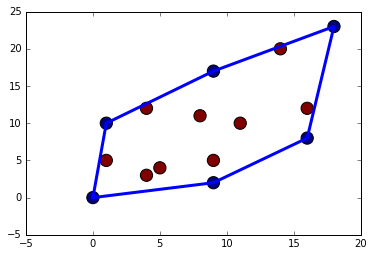

In [2]:
num = 15
xs = [np.random.randint(25) for x in xrange(num)]
ys = [np.random.randint(25) for x in xrange(num)]
points = zip(xs,ys)
hull = slow_convex_hull(points)
hx,hy = zip(*(hull + [hull[0]]))
fig, ax1 = plt.subplots()
ax1.scatter(xs, ys, c=[222 if x in hull else 1000 for x in points], s=150)
ax1.plot(hx,hy,'-',lw=3)